In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import gridspec
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
path = r"C:\Users\Rajesh\OneDrive\Documents\finalpreprocessed2.csv"
df = pd.read_csv(path)
df.head()

,Dur,Proto,Sport,Dport,State,TotPkts,TotBytes,SrcBytes,Label
0,0.055572,1,13485,1,CON,2,128,60,0
1,0.097566,1,35155,10,CON,2,474,145,0
2,0.000000,1,35155,21,INT,1,145,145,0
3,3598.238525,1,43565,23,CON,876,96819,47731,0
4,3591.619629,1,43565,23,CON,867,95866,47068,0


In [3]:
# Determine number of fraud cases in dataset 
Botnet= df[df['Label'] == 1] 
Normal = df[df['Label'] == 0] 
outlierFraction = len(Botnet)/float(len(Normal)) 
print(outlierFraction) 
print("\n")
print('Fraud Cases: {}'.format(len(df[df['Label'] == 1]))) 
print('Valid Transactions: {}'.format(len(df[df['Label'] == 0])))

0.026658729695708795


Fraud Cases: 26960
Valid Transactions: 1011301


In [4]:
# dividing the X and the Y from the dataset 
#df1 = df1.drop(['Proto'],axis =1)
df1=df[:]
df1 = df1.drop(['State','Proto'],axis =1)
X = df1.drop(['Label'], axis = 1) 
y = df1["Label"] 
print(X.shape) 
print(y.shape) 
# getting just the values for the sake of processing 
# (its a numpy array with no columns) 

(1038261, 6)
(1038261,)


In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state = 42, stratify =y)
print(X_train.shape)
print(y_test.shape)
count=0
for i in y_train:
    if i==1:
        count+=1
print(count)
count=0
for i in y_test:
    if i==1:
        count+=1
print(count)

(519130, 6)
(519131,)
13480
13480


In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-4.50515005e-01, -1.55958631e+00,  3.74690219e-01,
        -6.31325421e-03, -5.42656198e-03, -2.51394010e-03],
       [-4.50501797e-01,  5.39877801e-01, -6.88454218e-01,
        -4.62937497e-03, -5.06862202e-03, -2.26278950e-03],
       [-3.43957194e-01,  6.78248191e-01,  3.74690219e-01,
        -5.19066805e-03, -5.13675733e-03, -2.27958017e-03],
       ...,
       [-4.19661054e-01,  1.12352687e+00,  7.15251807e-01,
        -5.93905882e-03, -5.27743563e-03, -2.46333160e-03],
       [-4.50515929e-01, -1.88922285e+00,  4.22963930e+00,
        -6.50035191e-03, -5.44051962e-03, -2.51772392e-03],
       [-4.50515712e-01,  6.29559462e-01, -6.90615243e-01,
        -6.31325421e-03, -5.41333896e-03, -2.51323064e-03]])

In [ ]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,15)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    #Fit the model
    knn.fit(X_train, y_train)
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

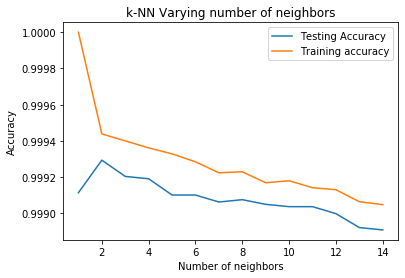

In [8]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [9]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k,p=8) 
    knn.fit(X_train, y_train) #fit the model
    train_accuracy[i] = knn.score(X_train, y_train)#Compute accuracy on the training set
    test_accuracy[i] = knn.score(X_test, y_test) #Compute accuracy on the test set

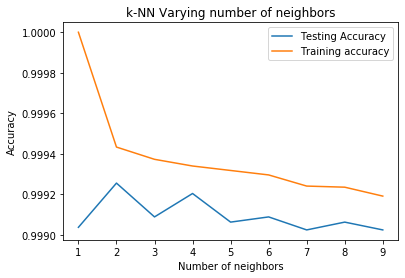

In [10]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [11]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
#Create KNN Classifier
#knn = KNeighborsClassifier(n_neighbors=4,P=2) f1:99, acc 999, precision: 996, recall : 98 matrrix: 1 - 19 0-4
#knn = KNeighborsClassifier(n_neighbors=4,P=8) f1:989, acc 9994, precision: 997, recall : 98 matrrix: 1 - 19 0-3
knn = KNeighborsClassifier(n_neighbors=4,p=8)

In [12]:
#Train the model using the training sets
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=8,
                     weights='uniform')

In [13]:
#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [14]:
#Let's check various metrics using sklearns inbuitl function to compare the values our custom functions generated
from sklearn import metrics 
print(f"Actual accuracy_score : {metrics.accuracy_score(y_test,y_pred.round()): .4f}") 
print(f"Actual recall_score : {metrics.recall_score(y_test,y_pred.round()): .4f}") 
print(f"Actual precision_score : {metrics.precision_score(y_test,y_pred.round()): .4f}") 
print(f"Actual f1_score : {metrics.f1_score(y_test,y_pred.round()): .4f}") 

Actual accuracy_score :  0.9992
Actual recall_score :  0.9733
Actual precision_score :  0.9960
Actual f1_score :  0.9845


In [15]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred.round()))
print(classification_report(y_test.round(),y_pred.round()))

[[75840     8]
 [   54  1968]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     75848
           1       1.00      0.97      0.98      2022

    accuracy                           1.00     77870
   macro avg       1.00      0.99      0.99     77870
weighted avg       1.00      1.00      1.00     77870



In [16]:
# Evaluating the classifier 
# printing every score of the classifier 
# scoring in anything 
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 

n_outliers = len(Botnet) 
n_errors = (y_pred != y_test).sum() 
print("The model used is Random Forest classifier")
print(n_outliers)
print(n_errors)
acc = accuracy_score(y_test, y_pred) 
print("The accuracy is {}".format(acc)) 

prec = precision_score(y_test, y_pred) 
print("The precision is {}".format(prec)) 

rec = recall_score(y_test, y_pred) 
print("The recall is {}".format(rec)) 

f1 = f1_score(y_test, y_pred) 
print("The F1-Score is {}".format(f1)) 

MCC = matthews_corrcoef(y_test, y_pred) 
print("The Matthews correlation coefficient is{}".format(MCC)) 

The model used is Random Forest classifier
26960
62
The accuracy is 0.9992038012071401
The precision is 0.9959514170040485
The recall is 0.973293768545994
The F1-Score is 0.9844922461230614
The Matthews correlation coefficient is0.9841523353586256


In [18]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
#Create KNN Classifier
#knn = KNeighborsClassifier(n_neighbors=4,P=2) f1:99, acc 999, precision: 996, recall : 98 matrrix: 1 - 19 0-4
#knn = KNeighborsClassifier(n_neighbors=4,P=8) f1:989, acc 9994, precision: 997, recall : 98 matrrix: 1 - 19 0-3
knn = KNeighborsClassifier(n_neighbors=2,p=8)

In [19]:
#Train the model using the training sets
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=8,
                     weights='uniform')

In [20]:
#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [21]:
#Let's check various metrics using sklearns inbuitl function to compare the values our custom functions generated
from sklearn import metrics 
print(f"Actual accuracy_score : {metrics.accuracy_score(y_test,y_pred.round()): .4f}") 
print(f"Actual recall_score : {metrics.recall_score(y_test,y_pred.round()): .4f}") 
print(f"Actual precision_score : {metrics.precision_score(y_test,y_pred.round()): .4f}") 
print(f"Actual f1_score : {metrics.f1_score(y_test,y_pred.round()): .4f}")

Actual accuracy_score :  0.9993
Actual recall_score :  0.9733
Actual precision_score :  0.9980
Actual f1_score :  0.9855


In [22]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred.round()))
print(classification_report(y_test.round(),y_pred.round()))

[[75844     4]
 [   54  1968]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     75848
           1       1.00      0.97      0.99      2022

    accuracy                           1.00     77870
   macro avg       1.00      0.99      0.99     77870
weighted avg       1.00      1.00      1.00     77870



In [1]:
TP = true_positives = 1968
TN = true_negatives = 75844
FP = false_positives = 4
FN = false_negatives = 54

In [2]:
#False Positive rate
FPR = FP/(TN+FP)
print("The flase positive rate of this model is{:.4f}".format(FPR))

The flase positive rate of this model is0.0001


In [7]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
#Create KNN Classifier
#knn = KNeighborsClassifier(n_neighbors=4,P=2) f1:99, acc 999, precision: 996, recall : 98 matrrix: 1 - 19 0-4
#knn = KNeighborsClassifier(n_neighbors=4,P=8) f1:989, acc 9994, precision: 997, recall : 98 matrrix: 1 - 19 0-3
knn = KNeighborsClassifier(n_neighbors=2,p=8)

In [8]:
#Train the model using the training sets
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=8,
                     weights='uniform')

In [9]:
#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [10]:
#Let's check various metrics using sklearns inbuitl function to compare the values our custom functions generated
from sklearn import metrics 
print(f"Actual accuracy_score : {metrics.accuracy_score(y_test,y_pred.round()): .4f}") 
print(f"Actual recall_score : {metrics.recall_score(y_test,y_pred.round()): .4f}") 
print(f"Actual precision_score : {metrics.precision_score(y_test,y_pred.round()): .4f}") 
print(f"Actual f1_score : {metrics.f1_score(y_test,y_pred.round()): .4f}")

Actual accuracy_score :  0.9993
Actual recall_score :  0.9782
Actual precision_score :  0.9956
Actual f1_score :  0.9868


In [11]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred.round()))
print(classification_report(y_test.round(),y_pred.round()))

[[252796     29]
 [   147   6593]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    252825
           1       1.00      0.98      0.99      6740

    accuracy                           1.00    259565
   macro avg       1.00      0.99      0.99    259565
weighted avg       1.00      1.00      1.00    259565



In [7]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
#Create KNN Classifier
#knn = KNeighborsClassifier(n_neighbors=4,P=2) f1:99, acc 999, precision: 996, recall : 98 matrrix: 1 - 19 0-4
#knn = KNeighborsClassifier(n_neighbors=4,P=8) f1:989, acc 9994, precision: 997, recall : 98 matrrix: 1 - 19 0-3
knn = KNeighborsClassifier(n_neighbors=2,p=8)

In [8]:
#Train the model using the training sets
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=8,
                     weights='uniform')

In [9]:
#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [10]:
#Let's check various metrics using sklearns inbuitl function to compare the values our custom functions generated
from sklearn import metrics 
print(f"Actual accuracy_score : {metrics.accuracy_score(y_test,y_pred.round()): .4f}") 
print(f"Actual recall_score : {metrics.recall_score(y_test,y_pred.round()): .4f}") 
print(f"Actual precision_score : {metrics.precision_score(y_test,y_pred.round()): .4f}") 
print(f"Actual f1_score : {metrics.f1_score(y_test,y_pred.round()): .4f}")

Actual accuracy_score :  0.9993
Actual recall_score :  0.9772
Actual precision_score :  0.9975
Actual f1_score :  0.9872


In [11]:
from sklearn.metrics import classification_report,confusion_matrix 
print(confusion_matrix(y_test,y_pred.round())) 
print(classification_report(y_test.round(),y_pred.round())) 

[[505618     33]
 [   308  13172]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    505651
           1       1.00      0.98      0.99     13480

    accuracy                           1.00    519131
   macro avg       1.00      0.99      0.99    519131
weighted avg       1.00      1.00      1.00    519131



In [13]:
# Evaluating the classifier 
# printing every score of the classifier 
# scoring in anything 
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 

n_outliers = len(Botnet) 
n_errors = (y_pred != y_test).sum() 
print("The model used is Random Forest classifier")
print(n_outliers)
print(n_errors)
acc = accuracy_score(y_test, y_pred) 
print("The accuracy is {}".format(acc)) 

prec = precision_score(y_test, y_pred) 
print("The precision is {}".format(prec)) 

rec = recall_score(y_test, y_pred) 
print("The recall is {}".format(rec)) 

f1 = f1_score(y_test, y_pred) 
print("The F1-Score is {}".format(f1)) 

MCC = matthews_corrcoef(y_test, y_pred) 
print("The Matthews correlation coefficient is{}".format(MCC)) 

The model used is Random Forest classifier
26960
341
The accuracy is 0.99934313304349
The precision is 0.9975009466111322
The recall is 0.9771513353115727
The F1-Score is 0.9872212853663106
The Matthews correlation coefficient is0.986939434620731
